In [1]:
import cv2
import numpy as np
BLUE, GREEN, RED, BLACK, WHITE = (255,0,0), (0,255,0), (0,0,255), (0,0,0), (255, 255, 255) 
DRAW_BG = {'color':BLACK, 'val':0} 
DRAW_FG = {'color':WHITE, 'val':1}

rect = (0, 0, 1, 1) 
drawing = False 
rectangle = False 
rect_over = False 
rect_or_mask = 100 
value = DRAW_FG 
thickness = 3

def onMouse(event, x, y, flags, param):
    global ix, iy, img, img2, drawing, value, mask, rectangle 
    global rect, rect_or_mask, rect_over
    if event == cv2.EVENT_RBUTTONDOWN:
        rectangle = True 
        ix, iy = x, y
    elif event == cv2.EVENT_MOUSEMOVE: 
        if rectangle:
            img = img2.copy() 
            cv2.rectangle(img, (ix, iy), (x, y), RED, 2) 
            rect = (min(ix, x), min(iy, y), abs(ix-x), abs(iy-y)) 
            rect_or_mask = 0
    elif event == cv2.EVENT_RBUTTONUP:
        rectangle = False 
        rect_over = True
        
        cv2.rectangle(img, (ix, iy), (x, y), RED, 2) 
        rect = (min(ix, x), min(iy, y), abs( ix-x), abs( iy-y)) 
        rect_or_mask = 0 
        print('n: 적용하기')
        
    if event == cv2.EVENT_LBUTTONDOWN: 
        if not rect_over:
            print('마우스 왼쪽 버튼을 누른채로 전경이 되는부분을 선택하세요') 
        else:
            drawing = True 
            cv2.circle(img, (x, y), thickness, value['color'], -1)
            cv2.circle(mask, (x, y), thickness, value['val'], -1) 
            
    elif event == cv2.EVENT_MOUSEMOVE: 
        if drawing:
            cv2.circle(img, (x, y), thickness, value['color'], -1)
            cv2.circle(mask, (x, y), thickness, value['val'], -1) 
            
    elif event == cv2.EVENT_LBUTTONUP: 
        if drawing:
            drawing = False 
            cv2.circle( img, (x, y), thickness, value['color'], -1) 
            cv2.circle(mask, (x, y), thickness, value['val'], -1)
    return


In [15]:
img3 = cv2.imread('0002m.jpg')

In [13]:
import matplotlib.pyplot as plt

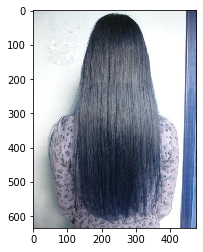

In [24]:
plt.imshow(output)

In [16]:
img4 = img3.shape[:2]

In [8]:
img.shape

(635, 477, 3)

In [14]:
output.shape

(635, 477, 3)

In [32]:
def grabcut():
    global ix, iy, img, img2, drawing, value, mask, rectangle 
    global rect, rect_or_mask, rect_over 
    img = cv2.imread('0002.jpg') 
    img2 = img.copy() 
    
    mask = img4
    output = np.zeros(img.shape, np.uint8)
    
    cv2.namedWindow ('input') 
    cv2.namedWindow('output') 
    cv2.setMouseCallback('input', onMouse, param=( img, img2)) 
    cv2.moveWindow('input', img.shape[1]+10, 90)
mask2 = np.where(True,255, 0).astype('uint8')
output = cv2.bitwise_and( img2, img2, mask=mask2)
grabcut()

error: OpenCV(4.3.0) C:\projects\opencv-python\opencv\modules\core\src\arithm.cpp:250: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'cv::binary_op'


In [4]:
def grabcut():
    global ix, iy, img, img2, drawing, value, mask, rectangle 
    global rect, rect_or_mask, rect_over 
    img = cv2.imread('0002.jpg') 
    img2 = img.copy() 
    
    mask = np.zeros(img.shape[:2], dtype=np.uint8) 
    output = np.zeros(img.shape, np.uint8)
    
    cv2.namedWindow ('input') 
    cv2.namedWindow('output') 
    cv2.setMouseCallback('input', onMouse, param=( img, img2)) 
    cv2.moveWindow('input', img.shape[1]+10, 90)
    
    print('오른쪽마우스 버튼을 누르고 영역을 지정한후 n을 누르세요')
    
    while True:
        cv2.imshow('output', output) 
        cv2.imshow('input', img) 
        k = cv2.waitKey(1) & 0xFF 
        if k == 27:
            break 
        if k == ord('0'):
            print('왼쪽 마우스로 제거할 부분을 표시한 후 n을 누르세요')
            value = DRAW_BG 
        elif k == ord('1'): 
            print('왼쪽 마우스로 복원할 부분을 표시한 후 n을 누르세요') 
            value = DRAW_FG 
        elif k == ord('r'): 
            print('리셋합니다') 
            rect = (0, 0, 1, 1) 
            drawing = False 
            rectangle = False 
            rect_or_mask = 100 
            rect_over = False 
            value = DRAW_FG 
            img = img2.copy 
            mask = np.zeros(img.shape[:2], dtype=np.uint8) 
            output = np.zeros(img.shape, np.uint8)
            print('0:제거배경선택 1:복원전경선택 n:적용하기 r:리셋') 
        elif k == ord('n'):
            bgdModel = np.zeros((1, 65), np.float64) 
            fgdModel = np.zeros((1, 65), np.float64)
            if rect_or_mask == 0:
                cv2.grabCut(img2, mask, rect, bgdModel, fgdModel, 1, cv2.GC_INIT_WITH_RECT)
                rect_or_mask = 1 
            elif rect_or_mask == 1:
                cv2.grabCut (img2, mask, rect, bgdModel, fgdModel, 1, cv2.GC_INIT_WITH_MASK) 
            print('0:제거배경선택 1:복원전경선택 n:적용하기 r:리셋') 
        mask2 = np.where((mask==1) + (mask==3), 255, 0). astype('uint8')
        output = cv2.bitwise_and( img2, img2, mask=mask2) 
    cv2.destroyallWindows()
grabcut()

오른쪽마우스 버튼을 누르고 영역을 지정한후 n을 누르세요
n: 적용하기
0:제거배경선택 1:복원전경선택 n:적용하기 r:리셋
왼쪽 마우스로 제거할 부분을 표시한 후 n을 누르세요
0:제거배경선택 1:복원전경선택 n:적용하기 r:리셋
0:제거배경선택 1:복원전경선택 n:적용하기 r:리셋
0:제거배경선택 1:복원전경선택 n:적용하기 r:리셋
0:제거배경선택 1:복원전경선택 n:적용하기 r:리셋
0:제거배경선택 1:복원전경선택 n:적용하기 r:리셋


KeyboardInterrupt: 

In [ ]:
cv2.setMouseCallback('input', onMouse, param=( img, img2)) 
    cv2.moveWindow('input', img.shape[1]+10, 90)
    
    print('오른쪽마우스 버튼을 누르고 영역을 지정한후 n을 누르세요')
    
    while True:
        cv2.imshow('output', output) 
        cv2.imshow('input', img) 
        k = cv2.waitKey(1) & 0xFF 
        
        if k == 27:
            break
            
        if k == ord('0'):
            print('왼쪽 마우스로 제거할 부분을 표시한 후 n을 누르세요')
            value = DRAW_BG 
        elif k == ord('1'): 
            print('왼쪽 마우스로 복원할 부분을 표시한 후 n을 누르세요') 
            value = DRAW_FG 
        elif k == ord('r'): 
            print('리셋합니다') 
            rect = (0, 0, 1, 1) 
            drawing = False 
            rectangle = False 
            rect_or_mask = 100 
            rect_over = False 
            value = DRAW_FG 
            img = img2.copy 
            mask = np.zeros(img.shape[:2], dtype=np.uint8) 
            output = np.zeros(img.shape, np.uint8)
            print('0:제거배경선택 1:복원전경선택 n:적용하기 r:리셋') 
        elif k == ord('n'):
            bgdModel = np.zeros((1, 65), np.float64) 
            fgdModel = np.zeros((1, 65), np.float64)
            if rect_or_mask == 0:
                cv2.grabCut(img2, mask, rect, bgdModel, fgdModel, 1, cv2.GC_INIT_WITH_RECT)
                rect_or_mask = 1 
            elif rect_or_mask == 1:
                cv2.grabCut (img2, mask, rect, bgdModel, fgdModel, 1, cv2.GC_INIT_WITH_MASK) 
            print('0:제거배경선택 1:복원전경선택 n:적용하기 r:리셋') 
        #mask2 = np.where((mask==1) + (mask==3), 255, 0).astype('uint8')

In [15]:
(mask==1)+(mask==3)


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [3]:
import cv2
import numpy as np

In [ ]:
    
        if k == ord('0'):
            print('왼쪽 마우스로 제거할 부분을 표시한 후 n을 누르세요')
            value = DRAW_BG 
        elif k == ord('1'): 
            print('왼쪽 마우스로 복원할 부분을 표시한 후 n을 누르세요') 
            value = DRAW_FG 
        elif k == ord('r'): 
            print('리셋합니다') 
            rect = (0, 0, 1, 1) 
            drawing = False 
            rectangle = False 
            rect_or_mask = 100 
            rect_over = False 
            value = DRAW_FG 
            img = img2.copy 
            mask = np.zeros(img.shape[:2], dtype=np.uint8) 
            output = np.zeros(img.shape, np.uint8)
            print('0:제거배경선택 1:복원전경선택 n:적용하기 r:리셋') 
        elif k == ord('n'):
            bgdModel = np.zeros((1, 65), np.float64) 
            fgdModel = np.zeros((1, 65), np.float64)
            if rect_or_mask == 0:
                cv2.grabCut(img2, mask, rect, bgdModel, fgdModel, 1, cv2.GC_INIT_WITH_RECT)
                rect_or_mask = 1 
            elif rect_or_mask == 1:
                cv2.grabCut (img2, mask, rect, bgdModel, fgdModel, 1, cv2.GC_INIT_WITH_MASK) 
            print('0:제거배경선택 1:복원전경선택 n:적용하기 r:리셋') 